In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
from rdkit import Chem

In [3]:
import sys,os

In [4]:
sys.path.insert(0,"../../../xyz2mol/")

In [6]:
files = !ls ../input/structures/

In [7]:
len(files)

130775

In [9]:
files[0]

'dsgdb9nsd_000001.xyz'

In [11]:
for u in files:
    assert u.endswith(".xyz")

In [18]:
from xyz2mol import     read_xyz_file, xyz2mol


In [24]:
from tqdm import tqdm_notebook

In [40]:
outfilename="../input/xyz2mol.sdf"
status=[]
writer = Chem.SDWriter(outfilename)
for filename in tqdm_notebook(files):
    has_error=False
    err_msg=""
    try:
        atomicNumList, charge, xyz_coordinates = read_xyz_file("../input/structures/"+filename)
        mol = xyz2mol(atomicNumList, charge, xyz_coordinates, charged_fragments=True, quick=True)
        mol.SetProp("_Name",filename)
        writer.write(mol)
        if 0:
            smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
            m = Chem.MolFromSmiles(smiles)
            smiles = Chem.MolToSmiles(m, isomericSmiles=True)
            print(smiles)
    except Exception as  e :
        has_error=True
        err_msg=str(e)
    status.append([filename,has_error,err_msg])
    #break
writer.close()    

In [42]:
import pandas as pd

In [47]:
statusdf= pd.DataFrame(status,columns=['id','has_error','err_msg'])

In [50]:
statusdf['has_error'].sum()

15

In [56]:
statusdf[statusdf['has_error']].iloc[0]['err_msg']

'Sanitization error: Explicit valence for atom # 4 C greater than permitted'

In [78]:
statusdf.head()

id  has_error err_msg
0  dsgdb9nsd_000001.xyz      False        
1  dsgdb9nsd_000002.xyz      False        
2  dsgdb9nsd_000003.xyz      False        
3  dsgdb9nsd_000004.xyz      False        
4  dsgdb9nsd_000005.xyz      False

In [79]:
statusdf.to_csv("../input/xyz2mol.status.csv",index=None)

# test code (don't run)

In [85]:
print(Chem.MolToMolBlock(mol))  

dsgdb9nsd_133885.xyz
     RDKit          3D

 16 20  0  0  0  0  0  0  0  0999 V2000
   -1.4099    1.3373    0.4100 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5646    0.0991   -0.5169 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8329   -0.7076    0.6043 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.2710   -1.6186    0.1448 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5285   -0.7551    0.3395 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.2502    0.4586    1.0471 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0574    0.6112    0.5411 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.0959    0.3804   -0.9721 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.8167   -0.8131   -1.0224 C   0  0  2  0  0  0  0  0  0  0  0  0
   -2.0904    1.3271    1.2637 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4400    2.2872   -0.1275 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4540   -0.9673    1.4592 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.2778   -2.6979    0.1958 H   0  0  0  0  0  0  0  0  0  0  0  0
    2

In [99]:
conformer=mol.GetConformer()
for i in range(16):
    pos = conformer.GetAtomPosition(i) 
    print (pos.x,pos.y,pos.z)
    pos=rdkit.Geometry.rdGeometry.Point3D(i,i,i)
    conformer.SetAtomPosition(i,pos)
    

1.2607453273 -1.246753647 -1.9067671561
-1.5645935686 0.0991248506 -0.5169414085
-0.8328987002 -0.7075502499 0.6042954267
0.2710295071 -1.6186138429 0.1448045117
1.5284535968 -0.7551229418 0.3395081289
1.2502128073 0.4586399968 1.0471189507
-0.0573999238 0.6112101834 0.5411015062
-0.0959285633 0.3804239493 -0.9720975179
0.8166944813 -0.8130667666 -1.0223596478
-2.0904360778 1.3270660878 1.2636607576
-1.4400420103 2.2872179783 -0.1275429128
-1.4540044954 -0.9673087774 1.4592464484
0.2777789004 -2.6978723974 0.1957699995
2.5158540612 -1.1517837735 0.5273692559
0.0136988019 1.1994305695 -1.6801923032
1.2607453273 -1.246753647 -1.9067671561


In [100]:
conformer=mol.GetConformer()
for i in range(16):
    pos = conformer.GetAtomPosition(i) 
    print (pos.x,pos.y,pos.z)
    

0.0 0.0 0.0
1.0 1.0 1.0
2.0 2.0 2.0
3.0 3.0 3.0
4.0 4.0 4.0
5.0 5.0 5.0
6.0 6.0 6.0
7.0 7.0 7.0
8.0 8.0 8.0
9.0 9.0 9.0
10.0 10.0 10.0
11.0 11.0 11.0
12.0 12.0 12.0
13.0 13.0 13.0
14.0 14.0 14.0
15.0 15.0 15.0


In [88]:
a=mol.GetConformer()

In [89]:
a.SetAtomPosition(0,pos)

In [94]:
import rdkit
pos=rdkit.Geometry.rdGeometry.Point3D()

In [97]:
pos.x=3

In [98]:
pos.x

3.0

In [91]:
type(pos)

rdkit.Geometry.rdGeometry.Point3D

(-1.4098766039, 1.3373373609, 0.4099526107)

In [66]:
for u in mol.GetAtoms():
    print (u,u.GetAtomicNum())

<rdkit.Chem.rdchem.QueryAtom object at 0x7f7b8cb49bc0> 6
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49c60> 7
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49bc0> 6
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49c60> 6
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb97800> 6
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49c60> 8
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb97800> 6
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49c60> 6
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb97800> 6
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49c60> 1
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb97800> 1
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49c60> 1
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb97800> 1
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb49c60> 1
<rdkit.Chem.rdchem.Atom object at 0x7f7b8cb97800> 1
<rdkit.Chem.rdchem.Atom object at 0x7f7b8ce48260> 1


In [69]:
Chem.MolToSmiles(mol, isomericSmiles=True)

'[H]C1([H])N2[C@]3([H])[C@]14O[C@]1([H])[C@]([H])([C@@]24[H])[C@]31[H]'

In [70]:
Chem.MolToSmiles(mol, isomericSmiles=False)

'[H]C1([H])N2C3([H])C4([H])C5([H])OC13C2([H])C54[H]'

In [72]:
for u in mol.GetBonds():
    print (u)

In [73]:
u.GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [126]:
a=['AROMATIC',
 'DATIVE',
 #'DATIVEL',
 'DATIVEONE',
 #'DATIVER',
 'DOUBLE',
 'FIVEANDAHALF',
 'FOURANDAHALF',
 'HEXTUPLE',
 #'HYDROGEN',
 'IONIC',
 'ONEANDAHALF',
 #'OTHER',
 'QUADRUPLE',
 'QUINTUPLE',
 'SINGLE',
 'THREEANDAHALF',
 #'THREECENTER',
 'TRIPLE',
 'TWOANDAHALF',
 'UNSPECIFIED',
 'ZERO']

for bond in [ getattr(Chem.rdchem.BondType, u) for u in a]:
    print (bond)
    mol = Chem.RWMol()
    a=Chem.Atom(6)
    mol.AddAtom(a)
    a=Chem.Atom(1)
    mol.AddAtom(a)
    mol.AddBond(0, 1, bond)
    a=mol.GetBonds()[0]
    print (bond, a.GetBondTypeAsDouble())


AROMATIC
AROMATIC 1.5
DATIVE
DATIVE 1.0
DATIVEONE
DATIVEONE 1.0
DOUBLE
DOUBLE 2.0
FIVEANDAHALF
FIVEANDAHALF 5.5
FOURANDAHALF
FOURANDAHALF 4.5
HEXTUPLE
HEXTUPLE 6.0
IONIC
IONIC 0.0
ONEANDAHALF
ONEANDAHALF 1.5
QUADRUPLE
QUADRUPLE 4.0
QUINTUPLE
QUINTUPLE 5.0
SINGLE
SINGLE 1.0
THREEANDAHALF
THREEANDAHALF 3.5
TRIPLE
TRIPLE 3.0
TWOANDAHALF
TWOANDAHALF 2.5
UNSPECIFIED
UNSPECIFIED 0.0
ZERO
ZERO 0.0


1

1.0

In [77]:
type(Chem.rdchem.BondType.SINGLE)

rdkit.Chem.rdchem.BondType

In [75]:
dir(Chem.rdchem.BondType)

['AROMATIC',
 'DATIVE',
 'DATIVEL',
 'DATIVEONE',
 'DATIVER',
 'DOUBLE',
 'FIVEANDAHALF',
 'FOURANDAHALF',
 'HEXTUPLE',
 'HYDROGEN',
 'IONIC',
 'ONEANDAHALF',
 'OTHER',
 'QUADRUPLE',
 'QUINTUPLE',
 'SINGLE',
 'THREEANDAHALF',
 'THREECENTER',
 'TRIPLE',
 'TWOANDAHALF',
 'UNSPECIFIED',
 'ZERO',
 '__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__

In [67]:
from rdkit.Chem import Draw

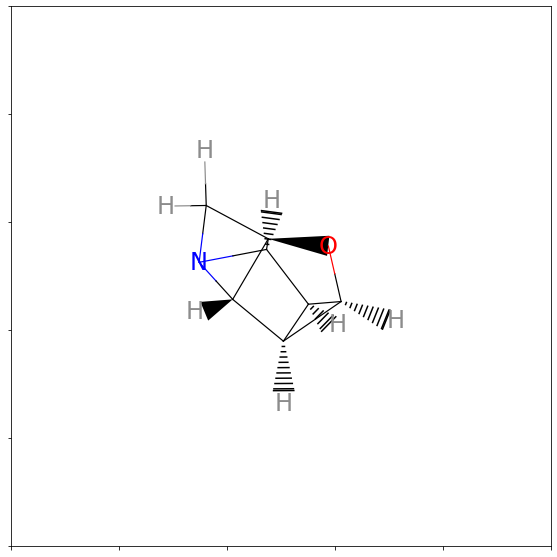

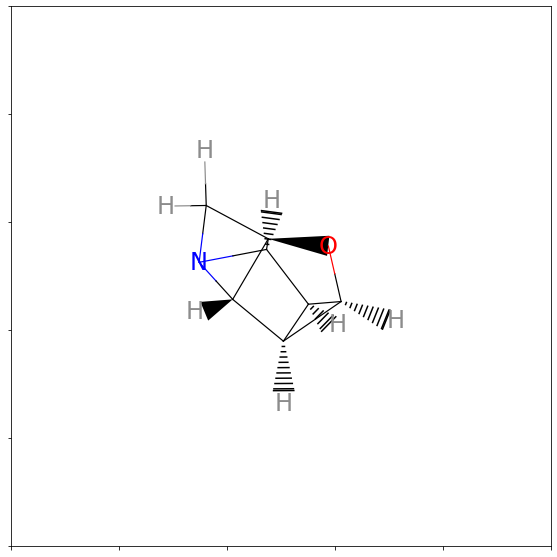

In [68]:
Draw.MolToMPL(mol)